### Exercício proposto no bloco **4**

In [ ]:
import geopandas as gpd
import pandas as pd
from shapely import Point

In [ ]:
url = 'https://github.com/alura-cursos/curso_geopandas/raw/main/dados/RJ_Municipios_2022.shp'
rj = gpd.read_file(url)
rj = rj[rj['NM_MUN'] == 'Rio de Janeiro']

In [ ]:
# Criar um dicionário com as coordenadas
dados = {
  'Latitude': [-22.9531, -23.0278, -22.8463, -22.8969],
  'Longitude': [-43.1884, -43.4665, -43.3007, -43.3165]
}

# Criar o DataFrame
df = pd.DataFrame(dados)

print(df)

   Latitude  Longitude
0  -22.9531   -43.1884
1  -23.0278   -43.4665
2  -22.8463   -43.3007
3  -22.8969   -43.3165


/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Axes: >

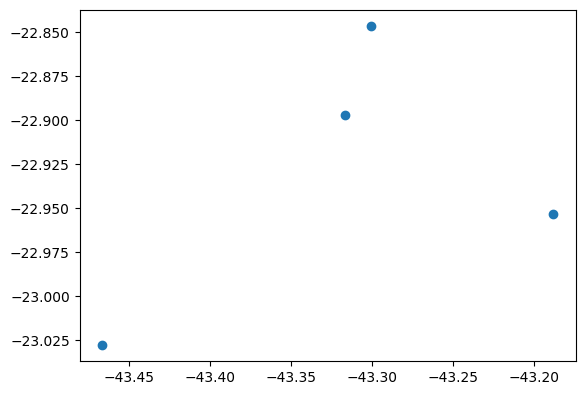

In [ ]:
pontos_geometricos = [Point(x) for x in zip(df['Longitude'], df["Latitude"])]
crs = {'init': 'epsg:4326'}
geo_dados = gpd.GeoDataFrame(df, crs=crs, geometry=pontos_geometricos)
geo_dados.plot()

In [ ]:
rj = rj.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')
geo_dados = geo_dados.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

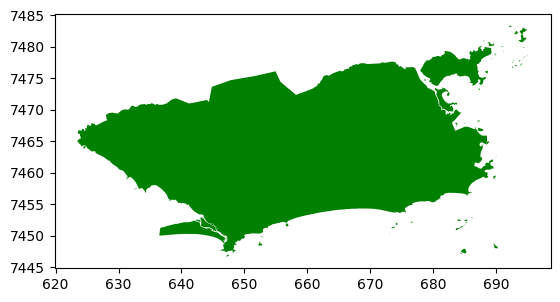

In [ ]:
base = rj.plot(color='green')

In [ ]:
geo_dados.iloc[0].geometry.within(rj.iloc[0].geometry)

True

In [ ]:
geo_dados.shape

(4, 3)

In [ ]:
geo_dados = geo_dados[geo_dados['geometry'].within(rj.iloc[0].geometry)]

<Axes: >

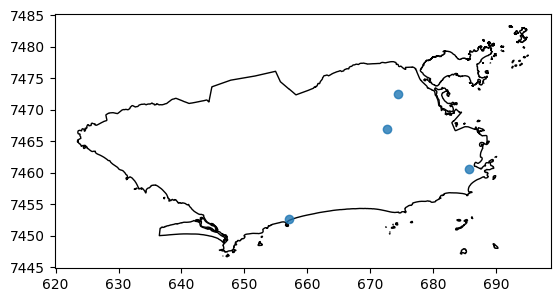

In [ ]:
base = rj.plot(color='white', edgecolor='black')
geo_dados.plot(ax=base, alpha=0.8)

In [ ]:
url_m = 'https://github.com/allanspadini/curso_geopandas/raw/main/dados/metro.geojson'
metro = gpd.read_file(url_m)
metro = metro.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')
metro.head()

,objectid,cod,nome,flg_atm,flg_bicicletario,flg_elevador,flg_linha1,flg_linha2,obs,flg_ativa,...,integra_trem,integra_onibus,integra_brt,corredor,integra_vlt,onibus,flg_metro_superficie,metro_superficie,data_inauguracao,geometry
0,1,1,Pavuna,1,1.0,1.0,0,1,NaN,1,...,1,0,0,NaN,0,NaN,0,NaN,1998,POINT (667.822 7476.957)
1,2,2,Engenheiro Rubens Paiva,1,1.0,1.0,0,1,NaN,1,...,0,0,0,NaN,0,NaN,0,NaN,1998,POINT (668.467 7475.882)
2,3,3,Acari / Fazenda Botafogo,0,0.0,0.0,0,1,NaN,1,...,0,0,0,NaN,0,NaN,0,NaN,1998,POINT (669.361 7474.958)
3,4,4,Coelho Neto,1,0.0,0.0,0,1,NaN,1,...,0,0,0,NaN,0,NaN,0,NaN,1998,POINT (670.008 7474.180)
4,5,5,Colégio,1,1.0,0.0,0,1,NaN,1,...,0,0,0,NaN,0,NaN,0,NaN,1998,POINT (670.958 7472.928)


<Axes: >

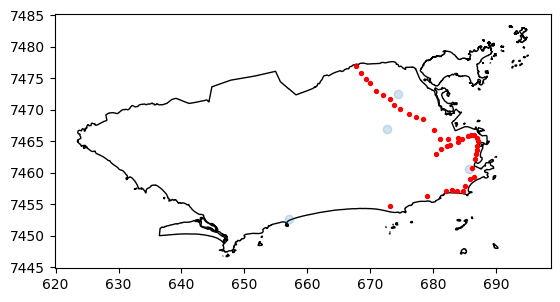

In [ ]:
base = rj.plot(color='white', edgecolor='black')
geo_dados.plot(ax=base, alpha=0.2)
metro.plot(ax=base, color='red', markersize=8)

In [ ]:
# Criando as colunas com as respostas
geo_dados['Metro_Perto'] = geo_dados['geometry'].apply(lambda x: metro['nome'].iloc[metro.distance(x).idxmin()])
geo_dados['Dist_Min'] = geo_dados['geometry'].apply(lambda x: "{0:.2f} km".format(metro.distance(x).min()))
geo_dados['Metro_Longe'] = geo_dados['geometry'].apply(lambda x: metro['nome'].iloc[metro.distance(x).idxmax()])
geo_dados['Dist_Max'] = geo_dados['geometry'].apply(lambda x: "{0:.2f} km".format(metro.distance(x).max()))

# Exibindo as respostas
geo_dados[['Metro_Perto', 'Dist_Min', 'Metro_Longe', 'Dist_Max']]

,Metro_Perto,Dist_Min,Metro_Longe,Dist_Max
0,Botafogo,0.51 km,Pavuna,24.31 km
1,Jardim Oceânico,16.11 km,Cinelândia,32.51 km
2,Vicente de Carvalho,1.54 km,Ipanema / General Osório,18.65 km
3,Engenho da Rainha,3.76 km,Cardeal Arcoverde,15.79 km


# Exercício 2 proposto no bloco **4**

<Axes: >

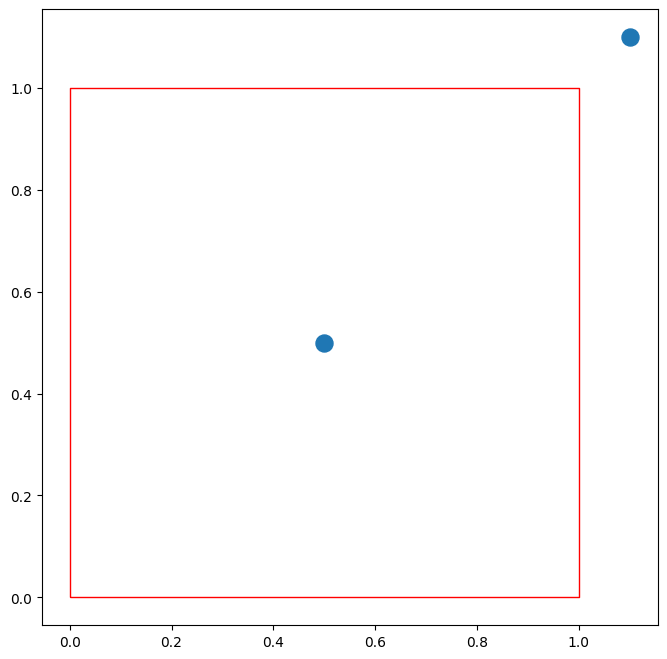

In [43]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

Square = Polygon([(0, 0), (1, 0), (1, 1), (0, 1)])

Point_A = Point(1.1, 1.1)
Point_B = Point(0.5, 0.5)

points = gpd.GeoDataFrame(geometry=[ Point_A, Point_B], index=['A', 'B'])
polygon = gpd.GeoDataFrame(geometry=[Square], index=['P'])

base = polygon.plot(color='white', edgecolor='red', figsize=(15,8))
points.plot(ax=base, markersize=150)

In [45]:
# Respostas...
print(points.loc['B'].geometry.within(polygon.iloc[0].geometry))
print(polygon.iloc[0].geometry.contains(points.loc['A'].geometry))
print(points.distance(points.loc['A'].geometry).iloc[0])
print(points.distance(points.loc['B'].geometry).loc['B'])
print(polygon['geometry'].apply(lambda x: points.distance(x))['B'].iloc[0])

True
False
0.0
0.0
0.0


# Exercício 3 proposto no bloco **4**

In [2]:
from shapely.geometry import MultiPolygon, Polygon, Point, LineString

#Ponto
p1 = Point(0.5,0.5)

#Linha
p2 = LineString([(0,1),(3,0),(1,1)])

##Polígonos
p3 = Polygon([(1,0),(1.5,0.4),(2,0)])
p4 = Polygon([(1,1),(1.5,0.6),(2,1)])


<Axes: >

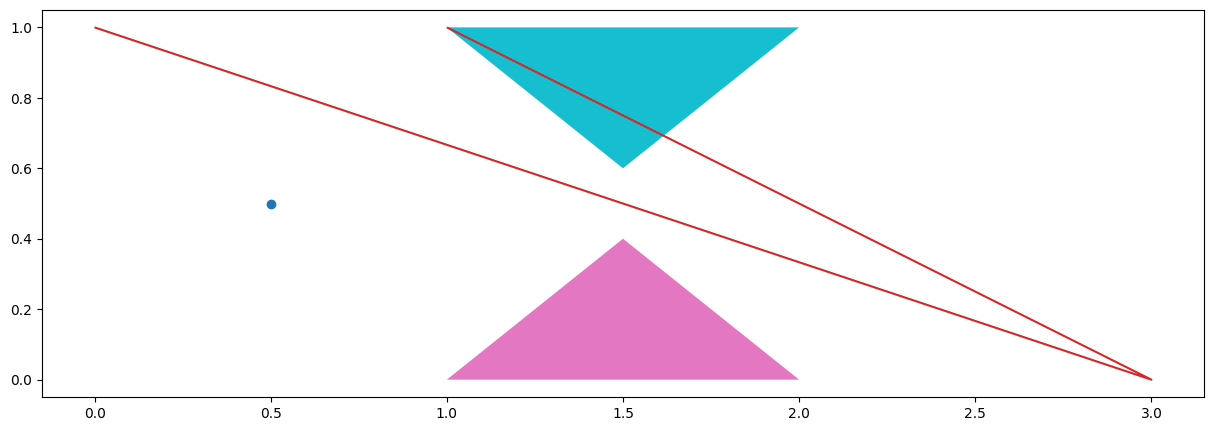

In [3]:
import geopandas as gpd
g = gpd.GeoSeries([p1,p2,p3,p4])
g.plot(cmap='tab10',figsize=(15,10))

<Axes: >

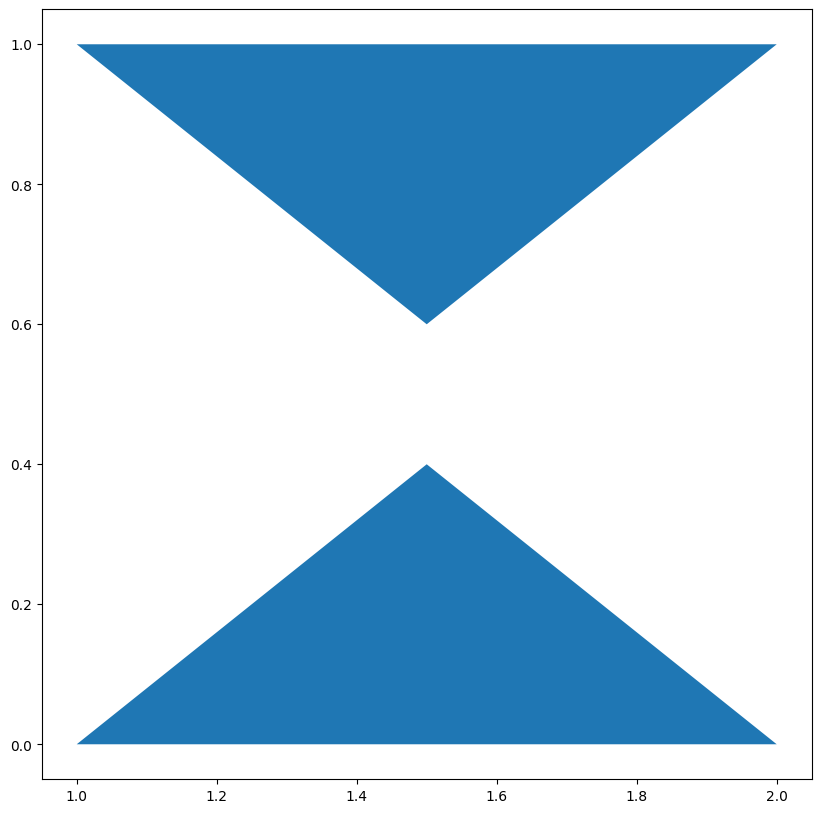

In [4]:
p8 = MultiPolygon([p3,p4])
g = gpd.GeoSeries([p8])
g.plot(cmap='tab10',figsize=(15,10))

In [5]:
# Desenrolo do exercício de fato!!
from shapely import Point, Polygon, MultiPolygon, LineString
import geopandas as gpd

<Axes: >

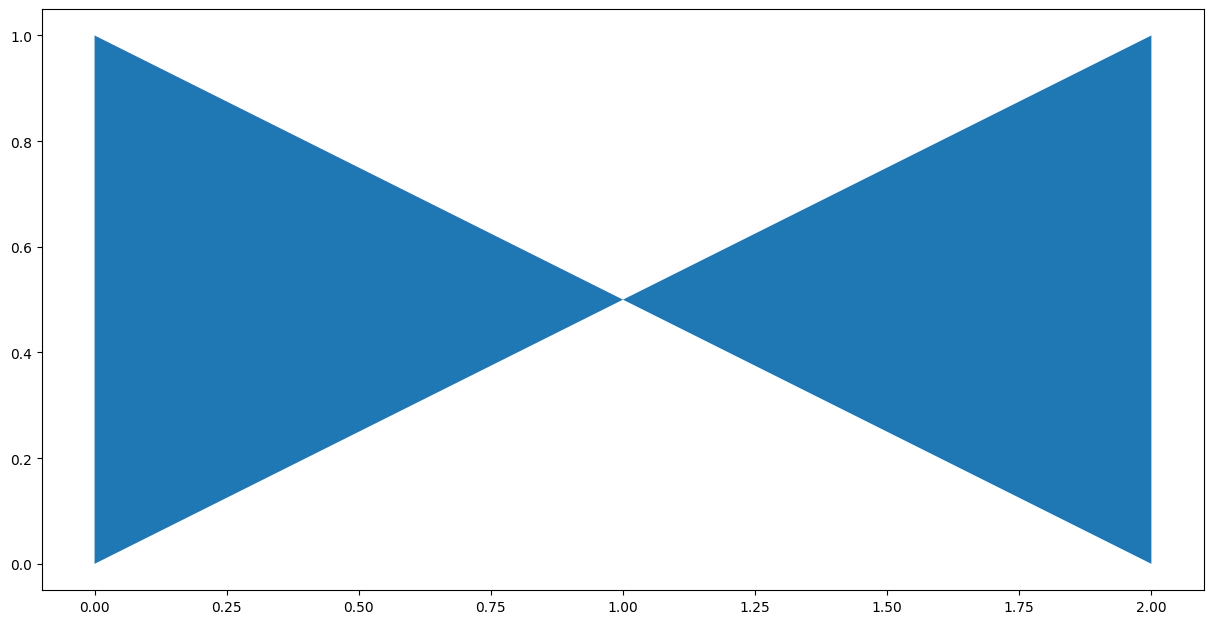

In [6]:
p1 = Polygon([(0, 0), (2, 1), (2, 0), (0, 1)])

g = gpd.GeoSeries([p1])
g.plot(cmap='tab10', figsize=(15,8))


<Axes: >

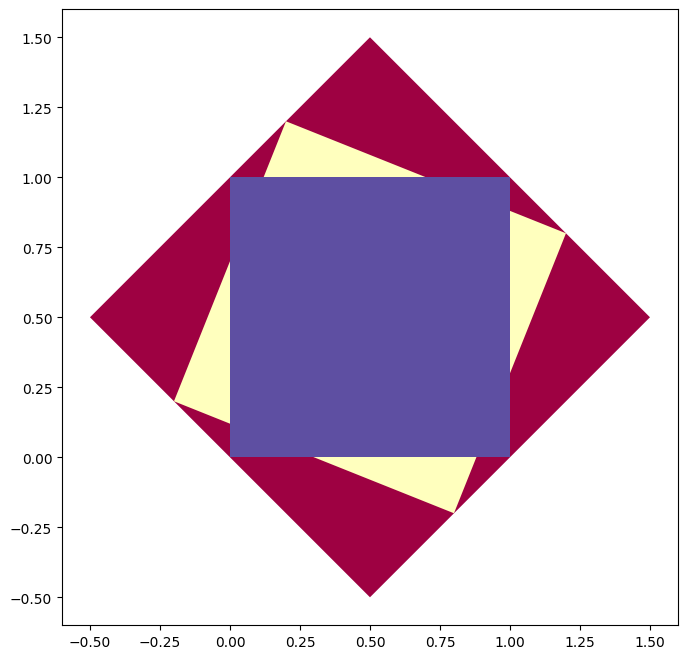

In [7]:
figuras = []
for i in [0.5, 0.2, 0]:
    figuras.append(Polygon([(0 - i, 0 + i),
                            (1 - i, 0 - i),
                            (1 + i, 1 - i),
                            (0 + i, 1 + i)]))

g = gpd.GeoSeries(figuras)
g.plot(cmap='Spectral', figsize=(15,8))

<Axes: >

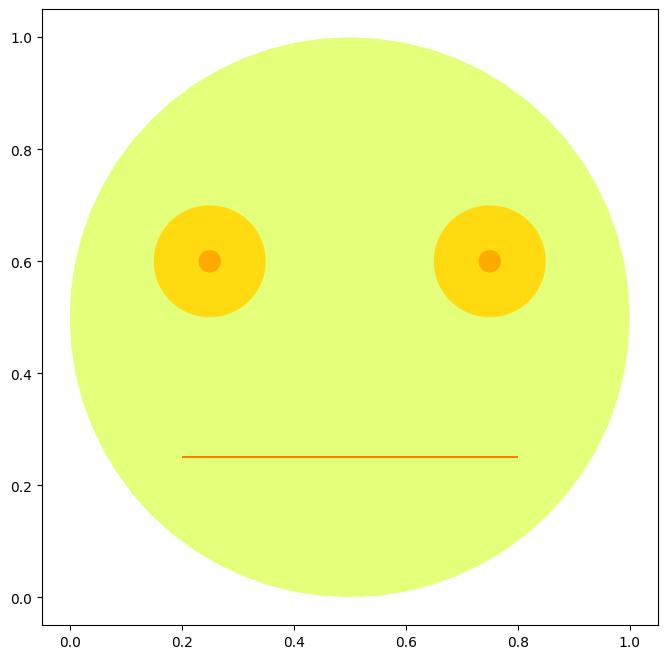

In [8]:
p1 = Point(0.5, 0.5).buffer(0.5)
p2 = MultiPolygon([Point(0.25, 0.6).buffer(0.1),
                    Point(0.75, 0.6).buffer(0.1)])
p3 = MultiPolygon([Point(0.25, 0.6).buffer(0.02),
                    Point(0.75, 0.6).buffer(0.02)])
p4 = LineString([(0.2, 0.25), (0.8, 0.25)])

g = gpd.GeoSeries([p1, p2, p3, p4])
g.plot(cmap='Wistia', figsize=(15,8))